 ### i) Replace the NaN values ​​to zero.

### ii) Replace the values ​​greater than or equal to 100 to zero

### iii) Replace the "timestamp" column name with tid. Next, replace existing values ​​of this column with 1, 2, 3, ...

### v) Implement the code "Dense data frame to transactional database" by setting >= condition and threshold value= 15.

### vi) Save the file as PM24HeavyPollutionRecordingSensors.csv. The output database represents the sensors where people were frequently exposed to harmful levels of air pollution.

In [171]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('pm25.csv', low_memory=False)

# NaN values to 0
df.fillna(0, inplace=True)

# Values >= 100 to 0
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: np.where(x >= 100, 0, x))

# Get the last valid index for the 'Timestamp' column
last_obsdate_index = df['Timestamp'].last_valid_index()

# Remove rows after the last valid index
df = df.iloc[:last_obsdate_index + 1]

# Drop 'Timestamp' column
df = df.drop(columns=['Timestamp'])

# Filter values >= 15 and replace others with None (NaN)
df = df.applymap(lambda x: x if x >= 15 else None)

# Shift data up to remove NaNs
df = df.apply(lambda series: series.dropna().reset_index(drop=True))

# Replace remaining NaNs with empty strings
df.fillna("", inplace=True)

# Remove columns where all values are NaN
df = df.replace("", np.nan).dropna(axis=1, how='all')

# Save the processed data to 'a.csv'
df.to_csv('PM24HeavyPollutionRecordingSensors.csv', index=False)


### iv) Install PAMI repository: pip install -U PAMI, and     Read Chapter 3 at  https://udaylab.github.io/PAMI/manuals/index.html

In [6]:
pip install -U PAMI

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: /home/jupyterHub/anaconda3/envs/jupyterHub/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## i) Read and Implement Chapter 5   https://udaylab.github.io/PAMI/manuals/index.html

1

In [21]:
import PAMI.extras.dbStats.transactionalDatabaseStats as stats

Database size (total no of transactions) : 99935
Number of items : 870
Minimum Transaction Size : 1
Average Transaction Size : 10.101836193525791
Maximum Transaction Size : 29
Standard Deviation Transaction Size : 3.667097909135199
Variance in Transaction Sizes : 13.447741640067324
Sparsity : 0.9883886940304302


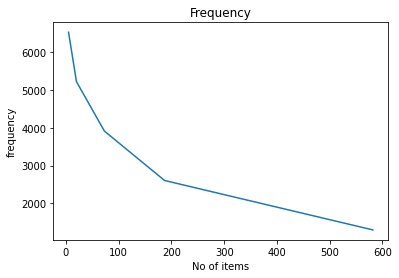

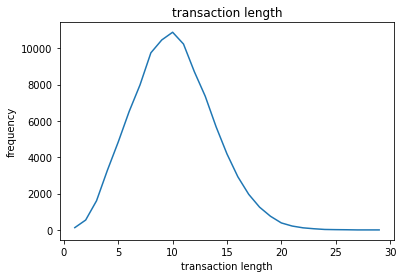

In [22]:
#import the class file
import PAMI.extras.dbStats.transactionalDatabaseStats as stats

#specify the file name
inputFile = 'Transactional_T10I4D100K.csv'

obj=stats.transactionalDatabaseStats(inputFile,sep='\t') 
obj.run() 

obj.printStats() 
obj.plotGraphs()

In [73]:
import PAMI.extras.dbStats.transactionalDatabaseStats as tds
    
inputFile = "Transactional_T10I4D100K.csv"

#initialize the program
obj = tds.transactionalDatabaseStats(inputFile)
#obj = tds.transactionalDatabaseStats(inputFile,sep='\t') #override default tab seperator

#execute the program
obj.run()

#print the database statistics
print(f'Database size : {obj.getDatabaseSize()}')
print(f'Total number of items : {obj.getTotalNumberOfItems()}')
print(f'Database sparsity : {obj.getSparsity()}')
print(f'Minimum Transaction Size : {obj.getMinimumTransactionLength()}')
print(f'Average Transaction Size : {obj.getAverageTransactionLength()}')
print(f'Maximum Transaction Size : {obj.getMaximumTransactionLength()}')
print(f'Standard Deviation Transaction Size : {obj.getStandardDeviationTransactionLength()}')
print(f'Variance in Transaction Sizes : {obj.getVarianceTransactionLength()}')

itemFrequencies = obj.getSortedListOfItemFrequencies()
transactionLength = obj.getTransanctionalLengthDistribution()
obj.save(itemFrequencies, 'itemFrequency.csv')
obj.save(transactionLength, 'transactionSize.csv')   

Database size : 99935
Total number of items : 870
Database sparsity : 0.9883886940304302
Minimum Transaction Size : 1
Average Transaction Size : 10.101836193525791
Maximum Transaction Size : 29
Standard Deviation Transaction Size : 3.667097909135199
Variance in Transaction Sizes : 13.447741640067324


2

In [74]:
#import the program
import PAMI.extras.dbStats.temporalDatabaseStats as tds
          
inputFile ="Transactional_T10I4D100K.csv"
#initialize the program
obj = tds.temporalDatabaseStats(inputFile)
# obj = tds.temporalDatabaseStats(inputFile, sep=',')  #overrride default tab seperator
obj.run()

print(f'Database size : {obj.getDatabaseSize()}')
print(f'Total number of items : {obj.getTotalNumberOfItems()}')
print(f'Database sparsity : {obj.getSparsity()}')
print(f'Minimum Transaction Size : {obj.getMinimumTransactionLength()}')
print(f'Average Transaction Size : {obj.getAverageTransactionLength()}')
print(f'Maximum Transaction Size : {obj.getMaximumTransactionLength()}')
print(f'Standard Deviation Transaction Size : {obj.getStandardDeviationTransactionLength()}')
print(f'Variance in Transaction Sizes : {obj. getVarianceTransactionLength()}')
print(f'Minimum period : {obj.getMinimumPeriod()}')
print(f'Average period : {obj.getAveragePeriod()}')
print(f'Maximum period : {obj.getMaximumPeriod()}')

itemFrequencies = obj.getSortedListOfItemFrequencies()
transactionLength = obj.getTransanctionalLengthDistribution()
numberOfTransactionPerTimeStamp = obj.getNumberOfTransactionsPerTimestamp()
obj.save(itemFrequencies,'itemFrequency.csv')
obj.save(transactionLength, 'transactionSize.csv')
obj.save(numberOfTransactionPerTimeStamp, 'numberOfTransaction.csv')

Database size : 99935
Total number of items : 869
Database sparsity : 0.9895260803296596
Minimum Transaction Size : 0
Average Transaction Size : 9.101836193525791
Maximum Transaction Size : 28
Standard Deviation Transaction Size : 3.667097909135199
Variance in Transaction Sizes : 13.447741640067324
Minimum period : 1
Average period : 1.0
Maximum period : 1


3

In [77]:
#import the class file
import PAMI.extras.dbStats.transactionalDatabaseStats as stats

#specify the file name
inputFile = 'Transactional_T10I4D100K.csv'

#initialize the class
obj=stats.transactionalDatabaseStats(inputFile,sep='\t')

#execute the class
obj.run()

#Printing each of the database statistics
print(f'Database size : {obj.getDatabaseSize()}')
print(f'Total number of items : {obj.getTotalNumberOfItems()}')
print(f'Database sparsity : {obj.getSparsity()}')
print(f'Minimum Transaction Size : {obj.getMinimumTransactionLength()}')
print(f'Average Transaction Size : {obj.getAverageTransactionLength()}')
print(f'Maximum Transaction Size : {obj.getMaximumTransactionLength()}')
print(f'Standard Deviation Transaction Size : {obj.getStandardDeviationTransactionLength()}')
print(f'Variance in Transaction Sizes : {obj.getVarianceTransactionLength()}')

#saving the distribution of items' frequencies and transactional lengths
itemFrequencies = obj.getSortedListOfItemFrequencies()
transactionLength = obj.getTransanctionalLengthDistribution()
obj.save(itemFrequencies, 'itemFrequency.csv')
obj.save(transactionLength, 'transactionSize.csv')

#Alternative apporach to print all of the database statistics and plot them
# obj.printStats()
# obj.plotGraphs()

Database size : 99935
Total number of items : 870
Database sparsity : 0.9883886940304302
Minimum Transaction Size : 1
Average Transaction Size : 10.101836193525791
Maximum Transaction Size : 29
Standard Deviation Transaction Size : 3.667097909135199
Variance in Transaction Sizes : 13.447741640067324


4,5

### iii) Implement the FP-growth algorithm by reading the manual: https://udaylab.github.io/PAMI/manuals/utilization.html   Try to find yourself an appropriate minSup value. 

## Download PM24HeavyPollutionRecordingSensors.csv from class14

In [186]:
minSup=10 #minSup is specified in count. However, the users can also specify minSup between 0 and 1.

In [187]:
from PAMI.frequentPattern.basic import FPGrowth  as alg #import the algorithm
inputFile='newPM24HeavyPollutionRecordingSensors.csv'
obj = alg.FPGrowth(iFile=inputFile, minSup=minSup, sep='\t')    #initialize
obj.startMine()            #start the mining process


obj.save('frequentPatternsAtMinSupCount300.txt') #save the patterns


frequentPatternsDF= obj.getPatternsAsDataFrame() #get the generated frequent patterns as a dataframe
print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 238
Runtime: 0.17748522758483887
Memory (RSS): 363532288
Memory (USS): 347172864


In [188]:
# ファイルを開く
with open('frequentPatternsAtMinSupCount300.txt', 'r') as f:
    max_num = float('-inf')  # Set infinitely small value as initial value
    max_line = ""
    for line in f:  # loop over each line in the file
        try:
            num = float(line.split(":")[1])  # get the part after ":" as a float
            if num > max_num:  # if the newly obtained number is greater than the current maximum
                max_num = num  # update max value
                max_line = line  # also update the row with the maximum value
        except ValueError:  # Ignore error when ":" is not a number
            pass

    print("Max number: ", max_num)
    print("Line with max number: ", max_line)


Max number:  177.0
Line with max number:  ['Point(131.4740591 32.0239101)']:177 



In [191]:

# Extract the part between "Point(" and ")"
start_index = max_line.index("Point(") + len("Point(")
end_index = max_line.index(")", start_index)

point_coordinates = max_line[start_index:end_index]
# split the coordinates using whitespace as delimiter
coordinates = point_coordinates.split()

# Get split coordinates
lat = float(coordinates[0])
lon = float(coordinates[1])

print(lat, lon)


131.4740591 32.0239101


In [192]:
import pandas as pd
import folium

# Set proper latitude and longitude values
latitude = lon
longitude = lat

map = folium.Map(location=[latitude, longitude], zoom_start=8)

folium.CircleMarker(
    [latitude, longitude],
    radius=10,
).add_to(map)

map


# It was found that high values of PM2.5 were frequently detected on this database in a certain area of Miyazaki Prefecture.

# This is a Github link
https://github.com/todorokitai/PAMI/blob/main/notebooks/Ex13.ipynb